<a href="https://colab.research.google.com/github/sedabicer/GlobalAIHubMLCourse/blob/main/Homeworks/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
#Generate dataset using make_blobs function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers=None, n_features=3,random_state=0)
X.shape

(2000, 3)

In [101]:
y

array([1, 2, 1, ..., 1, 2, 1])

In [107]:
#Explore and analyse raw data.
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from matplotlib import pyplot
import numpy as np

df = DataFrame(dict(x=X[:,0], y=X[:,1],z=X[:,2], label=y))
df

,x,y,z,label
0,0.378197,-0.822654,4.412505,1
1,0.112908,8.072768,9.914998,2
2,1.875986,-2.862337,1.955307,1
3,-1.210594,6.876798,9.223306,2
4,2.095730,3.335208,3.288496,0
...,...,...,...,...
1995,1.400683,5.393096,1.671082,0
1996,-2.237195,6.910680,8.794924,2
1997,1.582651,-0.526795,2.355266,1
1998,-1.033492,8.516043,9.546055,2


In [104]:
df.head()

,X1,X2,X3
0,0.378197,-0.822654,4.412505
1,0.112908,8.072768,9.914998
2,1.875986,-2.862337,1.955307
3,-1.210594,6.876798,9.223306
4,2.095730,3.335208,3.288496


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   X3      2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB


In [93]:
df.describe()

,X1,X2,X3
count,2000.000000,2000.000000,2000.000000
mean,0.240772,3.493821,4.739933
std,1.420266,4.002951,3.407143
min,-4.365209,-5.351844,-1.459501
25%,-0.758331,-0.964595,2.115543
50%,0.381250,4.278380,3.208216
75%,1.244579,7.137660,8.649354
max,4.077801,11.046691,12.079492


In [105]:
df.isna().sum()

X1    0
X2    0
X3    0
dtype: int64

In [110]:
df.groupby(by="label").count()

,x,y,z
label,,,
0,667,667,667
1,667,667,667
2,666,666,666


In [114]:
#Do preprocessing for classification.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["label"]) 
df.head()

,x,y,z,label,Label
0,0.378197,-0.822654,4.412505,1,1
1,0.112908,8.072768,9.914998,2,2
2,1.875986,-2.862337,1.955307,1,1
3,-1.210594,6.876798,9.223306,2,2
4,2.095730,3.335208,3.288496,0,0


In [115]:
df["Label"].value_counts()

1    667
0    667
2    666
Name: Label, dtype: int64

In [116]:
categories = list(label_encoder.inverse_transform([0, 1, 2]))
categories

[0, 1, 2]

In [168]:
#Split your dataset into train and test test (0.7 for train and 0.3 for test).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=123)

X_train

array([[ 1.08461963,  4.5654558 ,  1.14051219],
       [ 2.69848778,  4.7648368 ,  2.87241647],
       [ 3.08640284, -1.06540176,  4.0879479 ],
       ...,
       [ 0.3602126 , -0.84412369,  1.71695525],
       [-0.13722449,  7.48027067, 10.23703453],
       [-2.19773826,  6.19251268, 10.08648907]])

In [158]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test)) 

Accuracy of train: 1.0
Accuracy of test: 0.9983333333333333


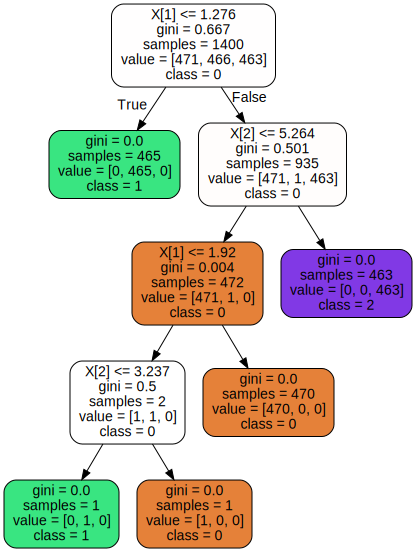

In [162]:
import os
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     class_names=classes,
                     filled=True, rounded=True
                    )
graph = graphviz.Source(dot_data)
graph

In [163]:
#XGBoos
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)


param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

preds = model.predict(dmatrix_test)
preds[:10]

array([[0.9963404 , 0.00182813, 0.00183146],
       [0.9963404 , 0.00182813, 0.00183146],
       [0.00199098, 0.9961791 , 0.00182992],
       [0.00199098, 0.9961791 , 0.00182992],
       [0.00199869, 0.00184728, 0.996154  ],
       [0.9963404 , 0.00182813, 0.00183146],
       [0.00199098, 0.9961791 , 0.00182992],
       [0.00199869, 0.00184728, 0.996154  ],
       [0.9963404 , 0.00182813, 0.00183146],
       [0.9963404 , 0.00182813, 0.00183146]], dtype=float32)

In [165]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2,
       2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2,
       0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2,
       2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2,
       0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1,
       2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0,

In [166]:
#Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       196
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       203

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [167]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9983498349834984
Recall = 0.9982993197278912
Accuracy = 0.9983333333333333
F1 Score = 0.998320355221601


When we look at the outlines test and training data and bias , we won't have a underfitting and overfitting problem.

